# Exemple 2 : Penguin dans seaborn

## Importation des données et exploration

In [4]:
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

df= seaborn.load_dataset("penguins")
df.head(n=5)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

On remarque que ce dataframe a 7 colonnes dont 4 numériques, trois catégorielles.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Vous remarquez des observations avec des données absentes (NaN -Not Available Number). Seule 333 observations sont complètes.

In [6]:
#suppression des lignes avec au moins une donnée absente
indexNaN = df.index[df.isnull().any(axis=1)]
df.drop(indexNaN,0, inplace=True)
df.describe()    

C:\Users\ecail\AppData\Local\Temp\ipykernel_11652\2815376733.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(indexNaN,0, inplace=True)


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

## analyse des redondances possibles entre variable


In [7]:
df.corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000

In [9]:
## Visualisation - difficultés du problème de classification

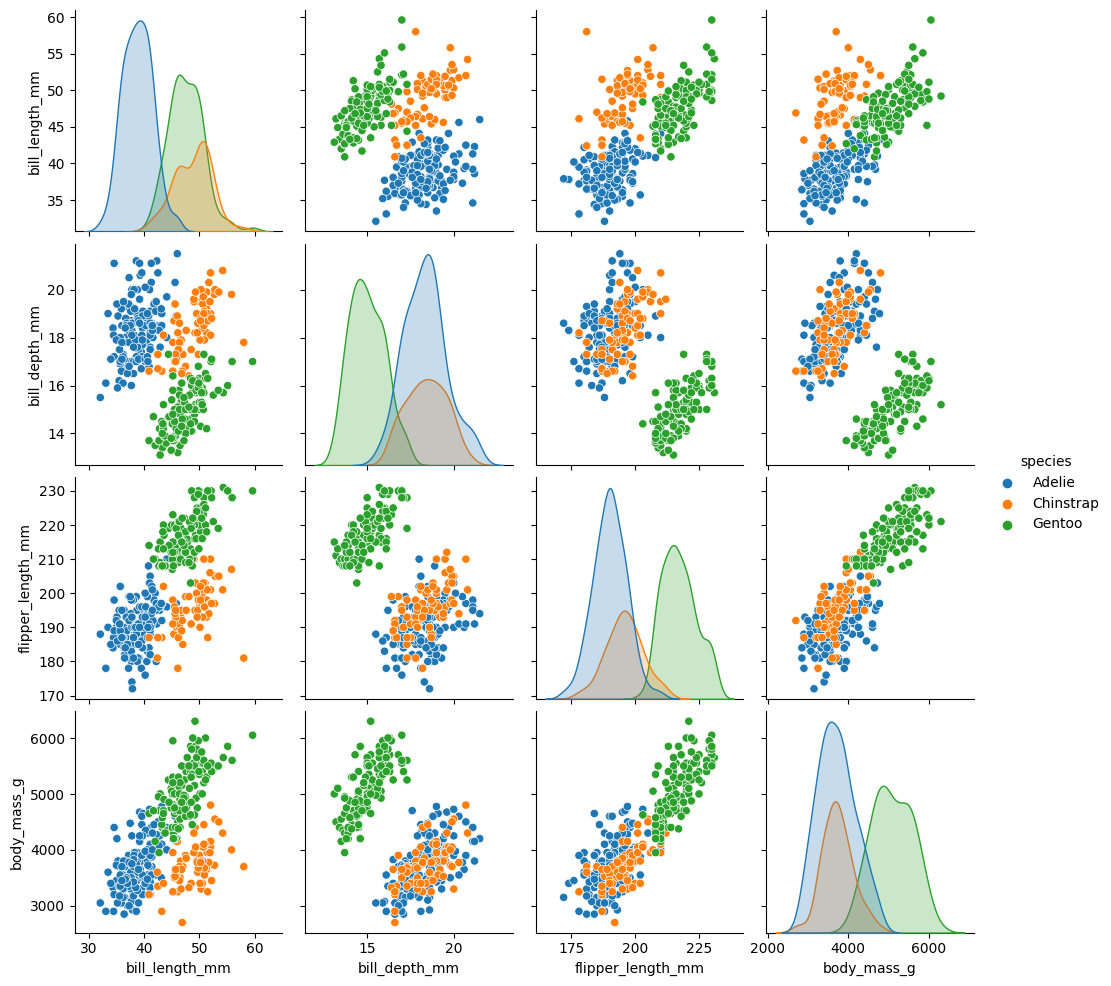

In [21]:
seaborn.pairplot(df,hue="species")

Les classes sont-elles toutes linéairement séparables selon un axe ? Quel paramètres semblent plus interessant pour discriminer une classe ? 

## Découpage de la base - vous pourrez optimiser toute la suite 

In [47]:
#exemple de decoupage non malin ;-p
N=df.shape[0]
Napp=(int)(N/2)
print(N)
print(Napp)
dataEx=df.iloc[:Napp,:]
dataEx.head()
Nex=dataEx.shape[0]
print(Nex)
dataTest=df.iloc[Napp:N,:]
dataTest.describe()
Ntest=dataTest.shape[0]
print(Ntest)

333
166
166
167


In [48]:
#à modifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(dataEx.iloc[:,2:5],dataEx["species"])
predictionAPP=model.predict(dataEx.iloc[:,2:5])
predictionTEST=model.predict(dataTest.iloc[:,2:5])

print(predictionAPP)

['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adel

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(dataEx["species"], predictionAPP))
print(confusion_matrix(dataTest["species"], predictionTEST))


[[146   0]
 [  0  20]]
[[  0   0   0]
 [ 11  37   0]
 [118   1   0]]


In [54]:
from sklearn.metrics import accuracy_score
accAPP=accuracy_score(dataEx["species"], predictionAPP)
accTEST=accuracy_score(dataTest["species"], predictionTEST)
print(f"taux de reconnaissance en apprentissage={accAPP*100:0.2f}")
print(f"taux de reconnaissance en généralisation={accTEST*100:0.2f}")

taux de reconnaissance en apprentissage=100.00
taux de reconnaissance en généralisation=22.16
